In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

In [2]:
from datasist.structdata import detect_outliers
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [5]:
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'autumn' , font_scale = 1.1 ,
              rc = {'figure.figsize' : (8,4)})

In [6]:
df = pd.read_csv('housing (2).csv')
df.head()

,crim,nox,rm,ptratio,lstat,medv
0,0.00632,0.538,6.575,15.3,4.98,24.0
1,0.02731,0.469,6.421,17.8,9.14,21.6
2,0.02729,0.469,7.185,17.8,4.03,34.7
3,0.03237,0.458,6.998,18.7,2.94,33.4
4,0.06905,0.458,7.147,18.7,5.33,36.2


In [7]:
df.isnull().mean()*100

crim       0.0
nox        0.0
rm         0.0
ptratio    0.0
lstat      0.0
medv       0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   nox      506 non-null    float64
 2   rm       506 non-null    float64
 3   ptratio  506 non-null    float64
 4   lstat    506 non-null    float64
 5   medv     506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


<AxesSubplot:xlabel='crim'>

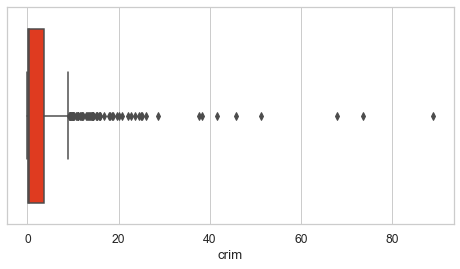

In [10]:
sns.boxplot(df['crim'])

In [11]:
df['crim'].loc[detect_outliers(df,0,['crim'])] = np.nan

<AxesSubplot:xlabel='nox'>

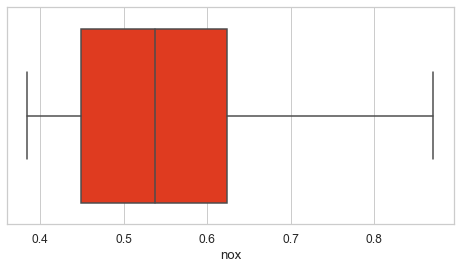

In [12]:
sns.boxplot(df['nox'])

In [13]:
df['nox'].loc[detect_outliers(df,0,['nox'])] = np.nan

<AxesSubplot:xlabel='rm'>

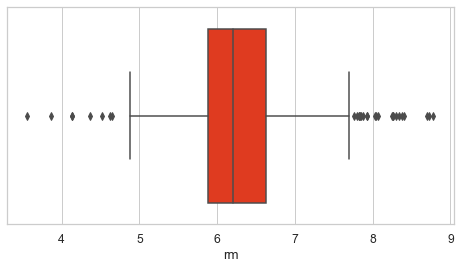

In [14]:
sns.boxplot(df['rm'])

In [15]:
df['rm'].loc[detect_outliers(df,0,['rm'])] = np.nan

<AxesSubplot:xlabel='ptratio'>

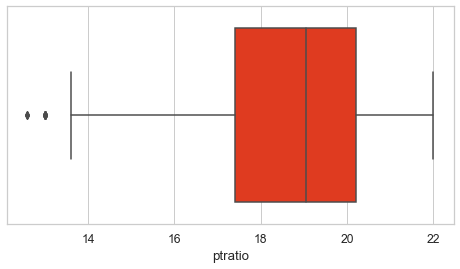

In [16]:
sns.boxplot(df['ptratio'])

In [17]:
df['ptratio'].loc[detect_outliers(df,0,['ptratio'])] = np.nan

<AxesSubplot:xlabel='lstat'>

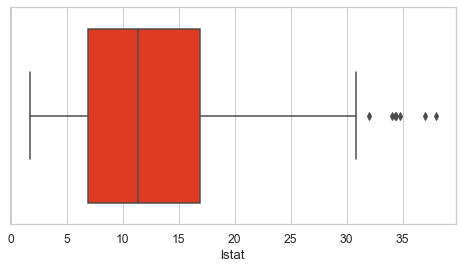

In [18]:
sns.boxplot(df['lstat'])

In [19]:
df['lstat'].loc[detect_outliers(df,0,['lstat'])] = np.nan

In [20]:
df.isnull().mean()*100

crim       13.043478
nox         0.000000
rm          5.928854
ptratio     2.964427
lstat       1.383399
medv        0.000000
dtype: float64

In [21]:
col_to_imput = df.columns[:-1]

In [22]:
col_to_imput

Index(['crim', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')

In [23]:
imputer = KNNImputer()

In [24]:
df[col_to_imput] = imputer.fit_transform(df[col_to_imput])

In [25]:
df.isnull().mean()*100

crim       0.0
nox        0.0
rm         0.0
ptratio    0.0
lstat      0.0
medv       0.0
dtype: float64

<AxesSubplot:>

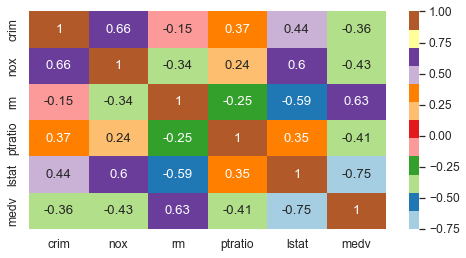

In [26]:
sns.heatmap(df.corr() , annot = True , cmap = 'Paired')

<AxesSubplot:xlabel='medv', ylabel='Density'>

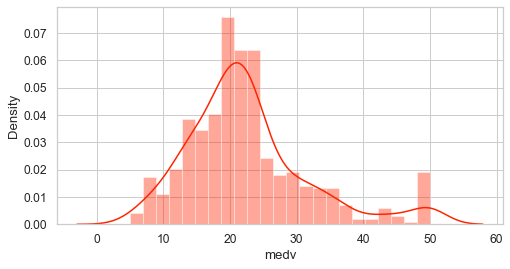

In [27]:
sns.distplot(df['medv'])

<AxesSubplot:xlabel='medv'>

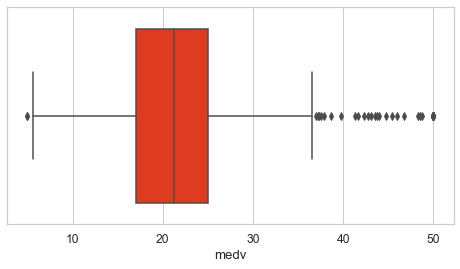

In [28]:
sns.boxplot(df['medv'])

In [29]:
x = df.drop(['medv'] , axis = 1)
y = np.log(df['medv'])

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 7)

In [31]:
sclr = RobustScaler()

In [32]:
x_train[x_train.columns] = sclr.fit_transform(x_train[x_train.columns])

In [33]:
x_test[x_test.columns] = sclr.transform(x_test[x_test.columns])

In [34]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train , y_train)

LinearRegression()

In [37]:
y_train_pred = model.predict(x_train)

In [38]:
mean_squared_error(y_true = y_train , y_pred = y_train_pred)

0.05131113221764008

In [39]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.7023708497495365

In [40]:
y_test_pred = model.predict(x_test)

In [41]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

0.03586278210190743

In [42]:
r2_score(y_true = y_test , y_pred = y_test_pred)

0.7329447201138547

In [43]:
poly = PolynomialFeatures(degree = 3)

In [44]:
x_train1 = poly.fit_transform(x_train1)

In [45]:
pmodel = LinearRegression()

In [46]:
pmodel.fit(x_train1 , y_train)

LinearRegression()

In [47]:
y_train1_pred = pmodel.predict(x_train1)

In [48]:
mean_squared_error(y_true = y_train , y_pred = y_train1_pred) 

0.027446531426706885

In [49]:
y_test1_pred = pmodel.predict(poly.transform(x_test1))

In [50]:
mean_squared_error(y_true = y_test , y_pred = y_test1_pred) 

0.030725872029761247

In [51]:
r2_score(y_true = y_train , y_pred = y_train1_pred)

0.8407969679716976

In [52]:
r2_score(y_true = y_test , y_pred = y_test1_pred)

0.7711971611310839